In [6]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [7]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]/255.0
y_train = y_train[masktrain]
X_test = X_test[masktest]/255.0
y_test = y_test[masktest]


X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

In [8]:
# create a PCA object with 2 components
pca = PCA(n_components=2)
# fit the data
pca.fit(X_train)
# transform the data using the PCA object
reduced_x_train = pca.transform(X_train)
print(reduced_x_train.shape)

(11774, 2)


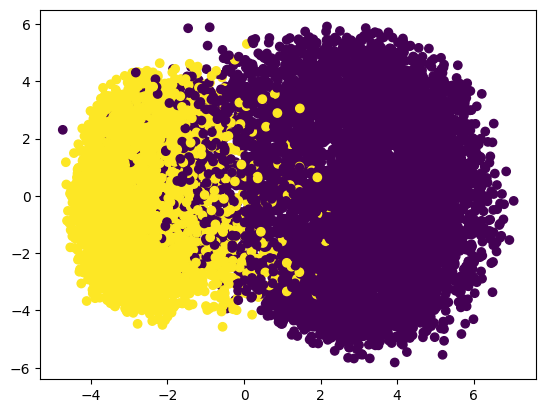

In [9]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [10]:
pca.fit(X_test)
reduced_x_test = pca.transform(X_test)
print(reduced_x_test.shape)

(1954, 2)


In [13]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_test, y_test)
y_pred = regressor.predict(reduced_x_test)

In [14]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[934  46]
 [ 38 936]]
Accuracy:  0.9570112589559877


the accuracy es better tan the other PCA model, it resumes the information of a correct way without complex number